<a href="https://colab.research.google.com/github/smithj27/Tech-Fundamentals-Project/blob/master/Data_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Total Rows and Columns for training
rows = train.shape[0]
columns = train.shape[1]
print("The total amount of columns in the train dataset is", columns, 
      "and the total amount of rows is", rows)

# Total Rows and Columns for testing
rows1 = test.shape[0]
columns1 = test.shape[1]
print("The total amount of columns in the test dataset is", columns1, 
      "and the total amount of rows is", rows1)

# Checking if any data is missing from our datasets
nulls = train.isnull().sum().sum()
print("We have", nulls, "missing data pieces in our train dataset.")

nulls = test.isnull().sum().sum()
print("We have", nulls, "missing data pieces in our test dataset.")

The total amount of columns in the train dataset is 4993 and the total amount of rows is 4459
The total amount of columns in the test dataset is 4992 and the total amount of rows is 49342
We have 0 missing data pieces in our train dataset.
We have 0 missing data pieces in our test dataset.


In [4]:
# We look here for more information about our dataset
def density(df):
  values = (df.ne(0).sum(axis=1)).sum()
  total_values = df.shape[0]*df.shape[1]
  result = values / total_values
  return result

#Training Dataset Density
density_train = density(train)
sparsity_train = 1 - density_train

percent_density1 = round(density_train * 100, 2)
percent_sparsity1 = round(sparsity_train * 100, 2)

print("Our train dataset holds the following spread:\n\nDensity Percentage:",
      percent_density1, "\nSparsity Percentage:", percent_sparsity1)

# Test Dataset Density
density_test = density(test)
sparsity_test = 1 - density_test

percent_density2 = round(density_test * 100, 2)
percent_sparsity2 = round(sparsity_test * 100, 2)

print("\nOur test dataset holds the following spread:\n\nDensity Percentage:",
      percent_density2, "\nSparsity Percentage:", percent_sparsity2)

Our train dataset holds the following spread:

Density Percentage: 3.18 
Sparsity Percentage: 96.82

Our test dataset holds the following spread:

Density Percentage: 1.42 
Sparsity Percentage: 98.58


In [5]:
# What is the spread of our data types
dtype = train.dtypes.reset_index()
dtype.columns = ["Value", "Data Type"]
dtype.groupby("Data Type").aggregate('count').reset_index()

# Store data types to allow for dataset analysis
hold = []
for items in train.columns:
  if items == 'ID':
    value = 'ID'
  elif items == 'target':
    value = 'Target'
  else:
    value = 'Data'
    
  include = True
  if value == 'ID':
    include = False
  
  dtype = train[items].dtype
  
  item_dict = {'variable': items, 'value': value, 'include': include,
               'dtype': dtype}
  
  hold.append(item_dict)
  
metadata = pd.DataFrame(hold, columns=['variable', 'value', 'include', 'dtype'])
metadata.set_index('variable', inplace = True)
metadata.head()

,value,include,dtype
variable,,,
ID,ID,False,object
target,Target,True,float64
48df886f9,Data,True,float64
0deb4b6a8,Data,True,int64
34b15f335,Data,True,float64


In [6]:
# Checking density for integers
# Density for integers for training
input = metadata[(metadata.dtype == 'int64') & (metadata.value == 'Data')].index
int_density = density(train[input])

int_sparsity = 1 - int_density
percent_den3 = round(int_density * 100, 2)
percent_spar3 = round(int_sparsity * 100, 2)

print("The following shows the spread of integer values for train:\n\nDensity Percentage:",
     percent_den3, '\nSparsity Percentage:', percent_spar3)

# Density for integers for test
int_density = density(test[input])

int_sparsity = 1 - int_density
percent_den4 = round(int_density * 100, 2)
percent_spar4 = round(int_sparsity * 100, 2)

print("\nThe following shows the spread of integer values for test:\n\nDensity Percentage:",
     percent_den4, '\nSparsity Percentage:', percent_spar4)

The following shows the spread of integer values for train:

Density Percentage: 1.14 
Sparsity Percentage: 98.86

The following shows the spread of integer values for test:

Density Percentage: 0.83 
Sparsity Percentage: 99.17


In [7]:
# Checking Density for Float Values
# Density for floats for training
input = metadata[(metadata.dtype == 'float64') & 
                 (metadata.value == 'Data')].index
float_density = density(train[input])

float_sparsity = 1 - float_density
percent_den5 = round(float_density * 100, 2)
percent_spar5 = round(float_sparsity * 100, 2)

print("The following shows the spread of floating point values for training:\n\nDensity Percentage:",
     percent_den5, '\nSparsity Percentage:', percent_spar5)

# Density for floats for test
float_density = density(test[input])

float_sparsity = 1 - float_density
percent_den6 = round(float_density * 100, 2)
percent_spar6 = round(float_sparsity * 100, 2)

print("The following shows the spread of floating point values for test:\n\nDensity Percentage:",
     percent_den6, '\nSparsity Percentage:', percent_spar6)

The following shows the spread of floating point values for training:

Density Percentage: 6.57 
Sparsity Percentage: 93.43
The following shows the spread of floating point values for test:

Density Percentage: 2.39 
Sparsity Percentage: 97.61


In [8]:
# Comparing density values between datasets
info = {'Datasets': ['Train', 'Test'], 
        'Total': [percent_density1, percent_density2],
        'Integers': [percent_den3, percent_den4], 
        'Floats': [percent_den5, percent_den6]}

compare = pd.DataFrame(info)
compare.set_index('Datasets', inplace=True)
compare

,Total,Integers,Floats
Datasets,,,
Train,3.18,1.14,6.57
Test,1.42,0.83,2.39


In [9]:
# Check to see if any columns hold constant values in training
check = [col for col in train.columns if not col in ['target', 'ID']]

total = 0
column_names = []
for values in check:
  if train[values].std() == 0:
    column_names.append(values)
    total += 1

print("There is a total of", total, 
      "columns that have constant values in training.")

# Check to see if any columns hold constant values in testing
check1 = [col for col in test.columns if not col in ['target', 'ID']]

total1 = 0
column_names1 = []
for values in check1:
  if test[values].std() == 0:
    column_names1.append(values1)
    total += 1

print("There is a total of", total1, 
      "columns that have constant values in testing.")

There is a total of 256 columns that have constant values in training.
There is a total of 0 columns that have constant values in testing.


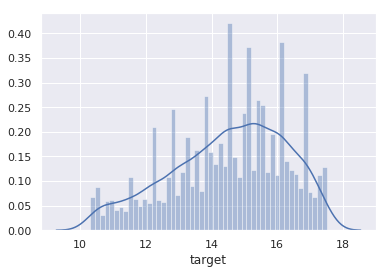

In [10]:
# Distribution of our target values
sns.set(color_codes = True)
sns.distplot(np.log1p(train["target"]), bins=50)

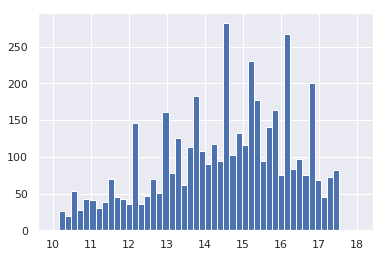

In [11]:
np.log1p(train["target"]).hist(bins=50, range=[10, 18])

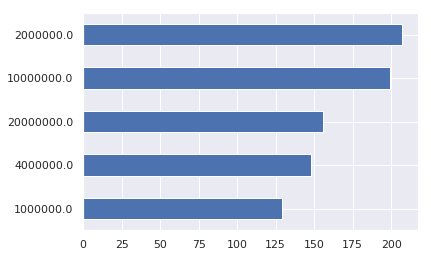

In [12]:
train["target"].value_counts().head().plot('barh').invert_yaxis()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


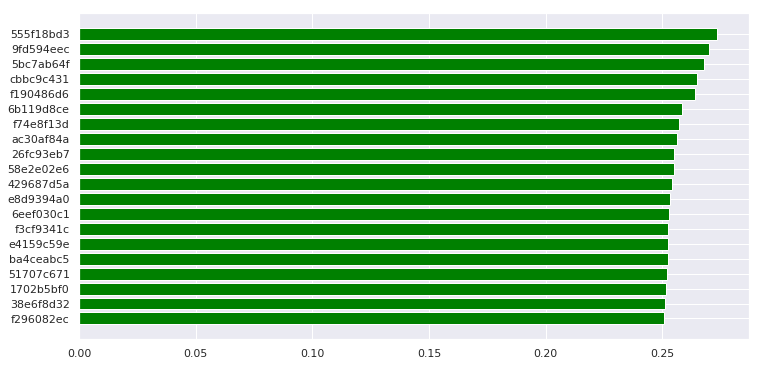

In [13]:
# Finding Coorlated Features
columns = []
values = []
for items in train.columns:
  if items not in ['target', 'ID']:
    columns.append(items)
    values.append(np.corrcoef(train[items].values, train['target'].values)[0,1])

# Base data on values that have a higher coorelation value
corrcoef = pd.DataFrame({"Columns": columns, "correlation": values})
corrcoef = corrcoef.sort_values(by="correlation")

corrcoef = corrcoef[(corrcoef['correlation']<-0.25) | (corrcoef['correlation']
                                                      >0.25)]

# Showing a visual graph of coorelation
tester = np.arange(corrcoef.shape[0])
f, ax = plt.subplots(figsize=(12,6))
sns.set_color_codes("muted")
graph = ax.barh(tester, np.array(corrcoef.correlation.values), color='green')
ax.set_yticks(tester)
ax.set_yticklabels(corrcoef.Columns.values, rotation='horizontal')
plt.show()

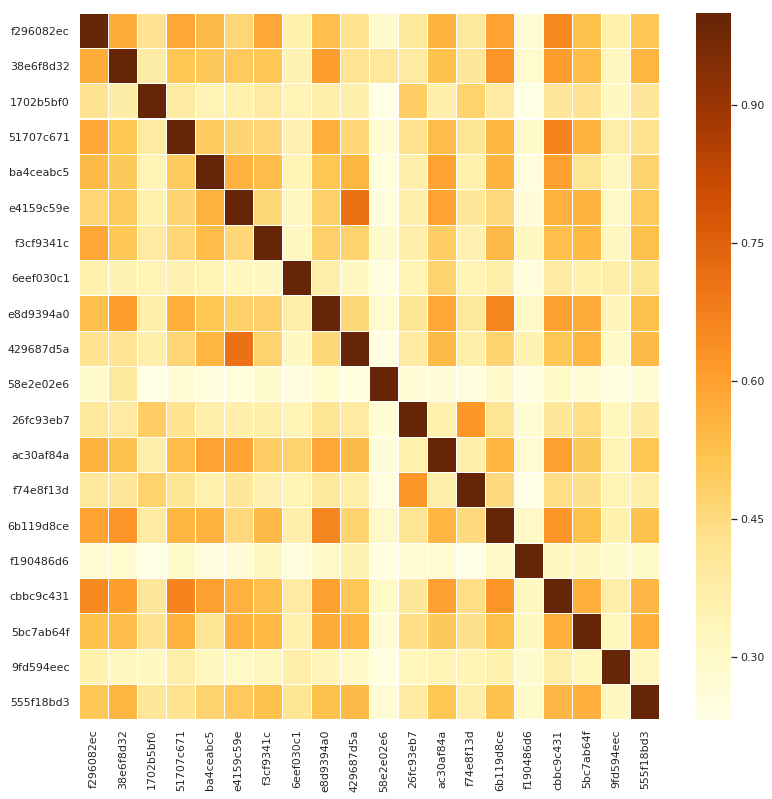

In [14]:
# Look on the correlation for selected features
new_df = train[corrcoef.Columns.tolist()]
hold = new_df.corr()
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(hold, vmax=1., linewidths=.25, cmap='YlOrBr')